In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

In [12]:
test_set = pd.read_csv('dataset/test_set_features.csv')
features = pd.read_csv('dataset/training_set_features.csv')
labels = pd.read_csv('dataset/training_set_labels.csv')

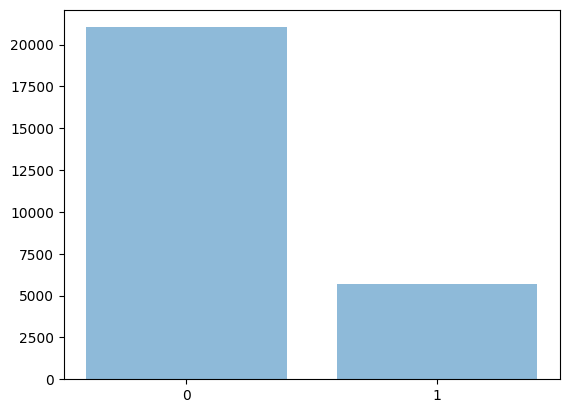

In [13]:
h1n1_vacc_dist = labels.groupby('h1n1_vaccine').size()
plt.bar(['0','1'],h1n1_vacc_dist, align='center', alpha=0.5)
plt.show()


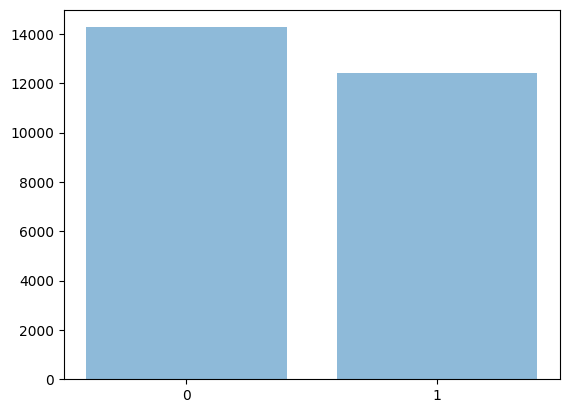

In [14]:
seasonal_vacc_dist = labels.groupby('seasonal_vaccine').size()
plt.bar(['0','1'],seasonal_vacc_dist, align='center', alpha=0.5)
plt.show()

In [19]:
na_feature = features.isna().sum()
na_feature

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [20]:
na_test_set = test_set.isna().sum()
na_test_set

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [17]:
# For float fill missing values with the mean
features = features.fillna(features.mean(numeric_only= True))
features = round(features)

# For string fill missing value with 'No Category'

features = features.fillna('NULL')

In [18]:
# For float fill missing values with the mean
test_set = test_set.fillna(test_set.mean(numeric_only= True))
test_set = round(test_set)

# For string fill missing value with 'No Category'

test_set = test_set.fillna('NULL')

In [21]:
enc = LabelEncoder()

In [23]:
features.age_group = enc.fit_transform(features.age_group)
test_set.age_group = enc.transform(test_set.age_group)

features.education = enc.fit_transform(features.education)
test_set.education = enc.fit_transform(test_set.education)

features.race = enc.fit_transform(features.race)
test_set.race = enc.fit_transform(test_set.race)

features.sex = enc.fit_transform(features.sex)
test_set.sex = enc.fit_transform(test_set.sex)

features.income_poverty = enc.fit_transform(features.income_poverty)
test_set.income_poverty = enc.fit_transform(test_set.income_poverty)

features.marital_status = enc.fit_transform(features.marital_status)
test_set.marital_status = enc.fit_transform(test_set.marital_status)

features.rent_or_own = enc.fit_transform(features.rent_or_own)
test_set.rent_or_own = enc.fit_transform(test_set.rent_or_own)

features.employment_status = enc.fit_transform(features.employment_status)
test_set.employment_status = enc.fit_transform(test_set.employment_status)

features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
test_set.hhs_geo_region = enc.fit_transform(test_set.hhs_geo_region)

features.census_msa = enc.fit_transform(features.census_msa)
test_set.census_msa = enc.fit_transform(test_set.census_msa)

features.employment_industry = enc.fit_transform(features.employment_industry)
test_set.employment_industry = enc.fit_transform(test_set.employment_industry)

features.employment_occupation = enc.fit_transform(features.employment_occupation)
test_set.employment_occupation = enc.fit_transform(test_set.employment_occupation)

In [24]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [25]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26708 non-null  float64
 2   h1n1_knowledge               26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_h1n1             26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [26]:
labels = labels.drop(columns=['respondent_id'])
labels

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


[0.03973363 0.02985573 0.0259033  0.00796759 0.01720286 0.0096984
 0.01215717 0.01816634 0.01836175 0.01677426 0.05258394 0.06449761
 0.01742745 0.01048655 0.01763271 0.00755159 0.04072269 0.04405321
 0.02992983 0.05722704 0.07220537 0.02979899 0.04734279 0.02922444
 0.01951408 0.02083091 0.02677766 0.01947502 0.01916294 0.01638488
 0.03712014 0.02877596 0.02512561 0.0212449  0.02460227 0.02448039]


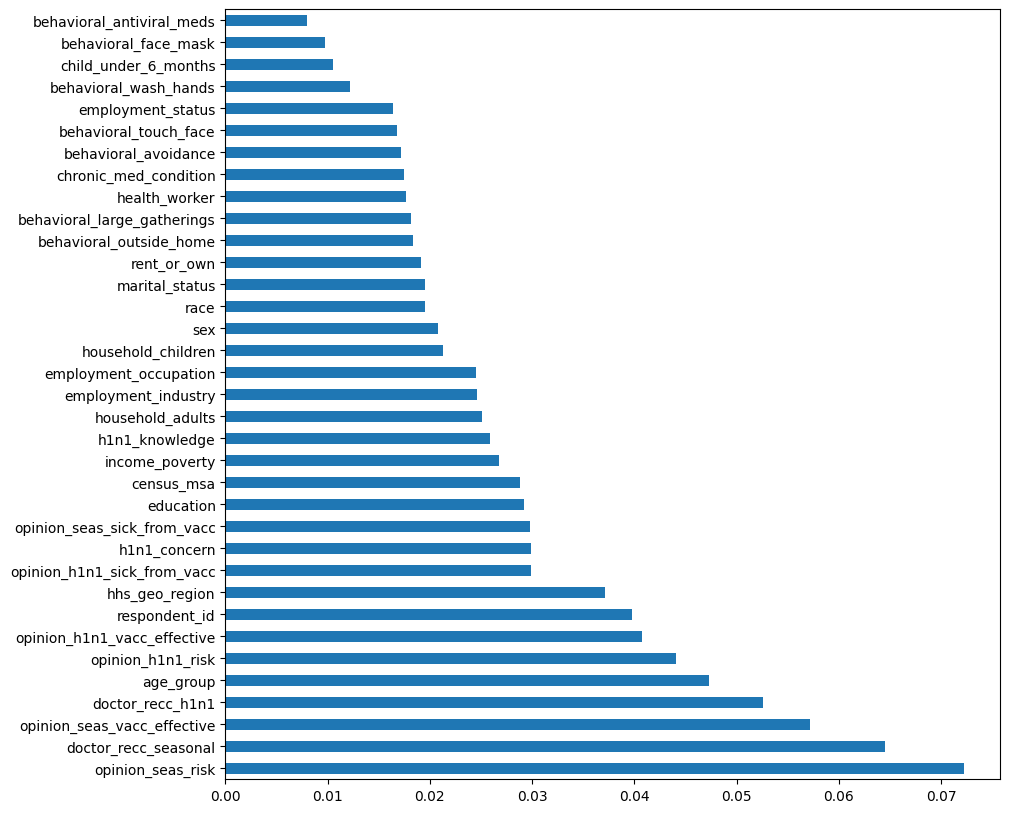

In [23]:
model = ExtraTreesClassifier()
model.fit(features,labels)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

In [27]:
features = features.drop(columns=['opinion_seas_risk', 'doctor_recc_h1n1','doctor_recc_seasonal','opinion_seas_vacc_effective','age_group','opinion_h1n1_risk','opinion_h1n1_vacc_effective','respondent_id','hhs_geo_region'])
test_set = test_set.drop(columns=['opinion_seas_risk', 'doctor_recc_h1n1','doctor_recc_seasonal','opinion_seas_vacc_effective','age_group','opinion_h1n1_risk','opinion_h1n1_vacc_effective','respondent_id','hhs_geo_region'])

In [28]:
features.to_csv('cleaned_features.csv', index = False)
test_set.to_csv('cleaned_test_set.csv', index = False)

In [33]:
# CHECKPOINT

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report



In [45]:
features = pd.read_csv('cleaned_features.csv')
test_set = pd.read_csv('cleaned_test_set.csv')
labels = pd.read_csv('dataset/training_set_labels.csv')

labels = labels.drop(columns=['respondent_id'])

In [40]:
x = features
y = labels

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 23)

In [42]:
# Initializing

model_RF = RandomForestClassifier(verbose=2, n_estimators= 500)

# Training

model_RF.fit(x_train,y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   20.3s finished


RandomForestClassifier(n_estimators=500, verbose=2)

In [43]:
# Predicting

y_pred_RF = model_RF.predict(x_test)

# Testing
RF = accuracy_score(y_test,y_pred_RF)
RF

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished


0.529264944465244

In [47]:
result = model_RF.predict(test_set)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.4s finished


In [49]:
result

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 0]], dtype=int64)

In [50]:
df = pd.DataFrame(result, columns=["h1n1_vaccine", "seasonal_vaccine"])
df

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
26703,0,0
26704,0,0
26705,0,0
26706,0,1


In [52]:
test_set = pd.read_csv('dataset/test_set_features.csv')

In [55]:
test_set.loc[:,"respondent_id"]

0        26707
1        26708
2        26709
3        26710
4        26711
         ...  
26703    53410
26704    53411
26705    53412
26706    53413
26707    53414
Name: respondent_id, Length: 26708, dtype: int64

In [57]:
df_respondent = test_set.respondent_id
df_respondent =  pd.DataFrame(df_respondent, columns=["respondent_id"])
df_respondent

,respondent_id
0,26707
1,26708
2,26709
3,26710
4,26711
...,...
26703,53410
26704,53411
26705,53412
26706,53413


In [62]:
df_respondent["h1n1_vaccine"]= df["h1n1_vaccine"] 
df_respondent["seasonal_vaccine"]= df["seasonal_vaccine"] 
df_respondent


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0,0
1,26708,0,0
2,26709,0,0
3,26710,0,1
4,26711,0,0
...,...,...,...
26703,53410,0,0
26704,53411,0,0
26705,53412,0,0
26706,53413,0,1


In [64]:
df_respondent.to_csv("bismillah.csv", index=False) 